In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets


In [4]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1)

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane",'automobile','bird','cat','deer','dog','frog','horse',
           'ship','truck']

In [12]:
def plot_sample(X,y,index):
    plt.figure(figsize = (14,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

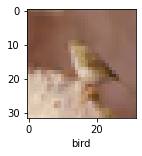

In [13]:
plot_sample(X_train,y_train,11050)

In [14]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
# ann = keras.Sequential([
#     keras.layers.Flatten(input_shape = (32,32,3)),
#     keras.layers.Dense(3000,activation='relu'),
#     keras.layers.Dense(1000,activation='relu'),
#     keras.layers.Dense(10,activation = 'sigmoid')
# ])

In [17]:
# ann.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',
#            metrics = ['accuracy'])

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_20008/4200379965.py, line 2)

In [ ]:
# ann.fit(X_train,y_train,epochs = 5)

In [19]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [20]:
cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [22]:
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2698 - accuracy: 0.5505
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.0346 - accuracy: 0.6387
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9283 - accuracy: 0.6782
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8520 - accuracy: 0.7016
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7899 - accuracy: 0.7260
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7391 - accuracy: 0.7426
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6956 - accuracy: 0.7576
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6535 - accuracy: 0.7713
Epoch 9/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.6138 - accuracy: 0.7846
Epoch 10/10
1563/1563 [==============================] - 48s 31m

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9346 - accuracy: 0.6962


[0.9345691204071045, 0.6962000131607056]